Intercept (w0): -2.6645352591003757e-15
Slope (w1): 1.5


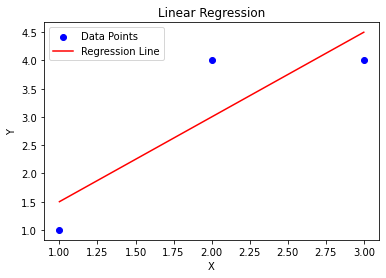

Predicted Y value for X = 4: 5.999999999999997


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Training data points
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input matrix (including bias term)
y = np.array([[1], [4], [4]])            # Output vector

# Step 1: Compute (X^T X)^(-1)
XTX = np.dot(X.T, X)                     # X^T X
XTX_inv = np.linalg.inv(XTX)              # Inverse of X^T X

# Step 2: Compute X^T y
XTy = np.dot(X.T, y)                     # X^T y

# Step 3: Calculate coefficients
coeff = np.dot(XTX_inv, XTy)              # Coefficients
w0 = coeff[0][0]                          # Intercept
w1 = coeff[1][0]                          # Slope

# Display coefficients
print("Intercept (w0):", w0)
print("Slope (w1):", w1)

# Step 4: Plot the data points and the regression line
plt.scatter(X[:, 1], y, color='blue', label='Data Points')  # Original data points
plt.plot(X[:, 1], X.dot(coeff), color='red', label='Regression Line')  # Regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Step 5: Make prediction for X = 4
x_new = np.array([[1, 4]])  # Include bias term
predicted_y = x_new.dot(coeff)  # Prediction
print("Predicted Y value for X = 4:", predicted_y[0][0])


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

alpha = 0.01
num_iter = 1000
lambda_reg = 0.1

X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0,
    n_informative=2, random_state=1, n_clusters_per_class=1
)

def add_ones(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def comp_p(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

X_1 = add_ones(X)

w = np.zeros(X_1.shape[1])
m = y.size

for i in range(num_iter):
    p_1 = comp_p(X_1, w)
    gradient = np.dot(X_1.T, (y - p_1)) / m
    w += alpha * (gradient - lambda_reg * w)

p_1_final = comp_p(X_1, w)
predicted_classes = (p_1_final >= 0.5).astype(int)
accuracy = np.mean(predicted_classes == y)

print("Accuracy of Logistic Regression without Regularization:", accuracy)

w_reg = np.zeros(X_1.shape[1])

for i in range(num_iter):
    p_1_reg = comp_p(X_1, w_reg)
    gradient_reg = np.dot(X_1.T, (y - p_1_reg)) / m
    w_reg += alpha * (gradient_reg - lambda_reg * w_reg)

p_1_reg_final = comp_p(X_1, w_reg)
predicted_classes_reg = (p_1_reg_final >= 0.5).astype(int)
accuracy_reg = np.mean(predicted_classes_reg == y)

print("Accuracy of Logistic Regression with L2 Regularization:", accuracy_reg)

model = LogisticRegression()
model.fit(X, y)

sklearn_intercept = model.intercept_[0]
sklearn_slope = model.coef_[0]

sklearn_predicted_classes = model.predict(X)
sklearn_accuracy = np.mean(sklearn_predicted_classes == y)

print("Sklearn Intercept (w0):", sklearn_intercept)
print("Sklearn Slope (w1):", sklearn_slope)
print("Accuracy using sklearn Logistic Regression:", sklearn_accuracy)


Accuracy of Logistic Regression without Regularization: 1.0
Accuracy of Logistic Regression with L2 Regularization: 1.0
Sklearn Intercept (w0): -0.13739198834282623
Sklearn Slope (w1): [-3.36679258  0.12342977]
Accuracy using sklearn Logistic Regression: 1.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load breast cancer data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


correlation_matrix = df.corr()  # Calculate the correlation matrix
correlation_with_target = correlation_matrix['target']  # Extract correlation with target
print("Correlation Coefficient of Each Feature with Target:")
print(correlation_with_target)  # Print the correlation coefficients

# Sort the correlation values in descending order and select the top 10 features
top_features = correlation_with_target.abs().sort_values(ascending=False).head(10)
print("\nTop 10 Features Correlated with Target:")
print(top_features)


Correlation Coefficient of Each Feature with Target:
mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst conca

In [4]:
import numpy as np
import pandas as pd

# Read iris dataset
data = pd.read_csv('iris.csv')

# X: input features
X = data.iloc[:, 0:4]

# Y: target
Y = data.iloc[:, 4]

# YOUR WORK HERE (6 pts)
covariance_matrix = np.cov(X.T)  # Compute covariance matrix of X
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # Compute eigenvalues and eigenvectors

# Choose TWO largest eigenvalues and their corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices of eigenvalues in descending order
largest_eigenvalues = eigenvalues[sorted_indices][:2]  # Get the two largest eigenvalues
eigvec_set = eigenvectors[:, sorted_indices][:, :2]  # Get corresponding eigenvectors

# 2) Visualization of PCA

# Compute projected data pca_X (dimension reduced from 4 to 2)
pca_X = np.dot(eigvec_set.transpose(), X.transpose()).transpose()  # Project the data onto the new basis

# YOUR WORK HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=Y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}), cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3) [bonus 6 pts] Implement PCA using sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)  # Fit and transform the data

# Compare the results with question 14-1
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}), cmap='viridis')
plt.xlabel('PC1 (sklearn)')
plt.ylabel('PC2 (sklearn)')
plt.title('PCA of Iris Dataset using sklearn')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'